In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
# Load the dataset
df=pd.read_csv('diabetes.csv')


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#EDA
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check for missing values (represented as 0 in some features)
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [9]:
# Replace 0 values with NaN for proper handling
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [10]:
 #Fill missing values with median
df.fillna(df.median(), inplace=True)

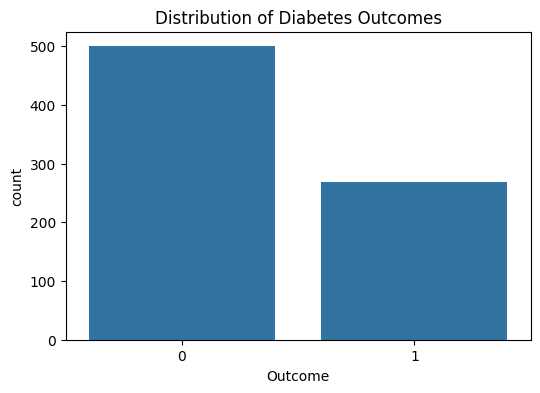

In [11]:
# Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcomes')
plt.show()


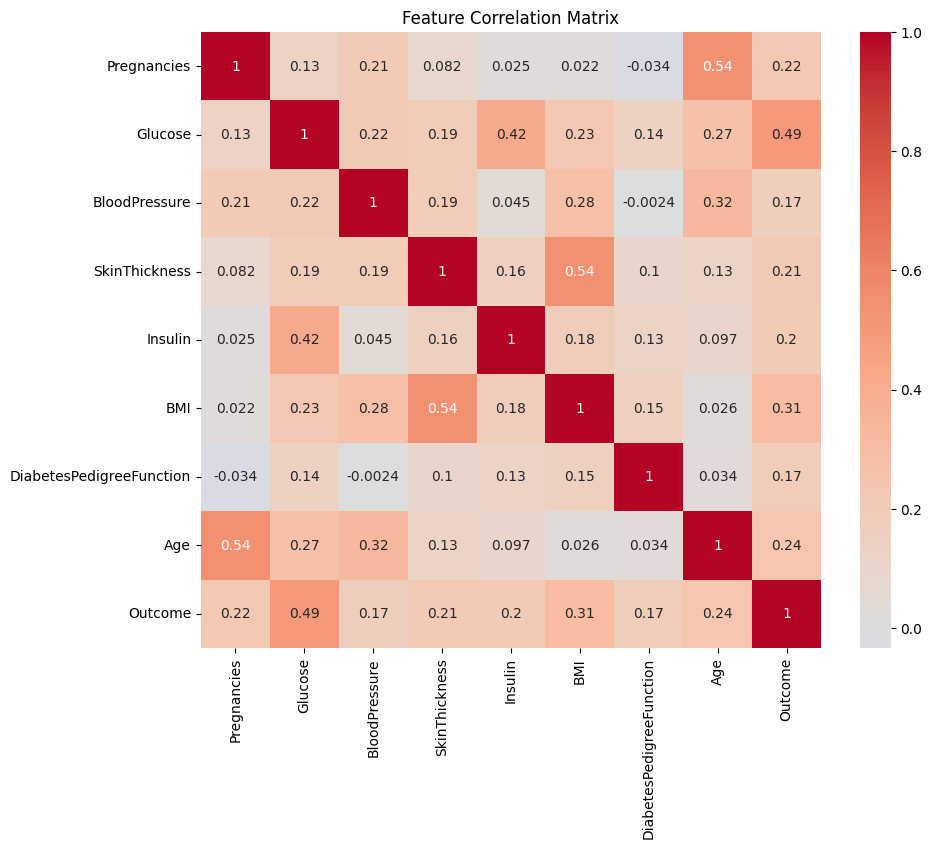

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


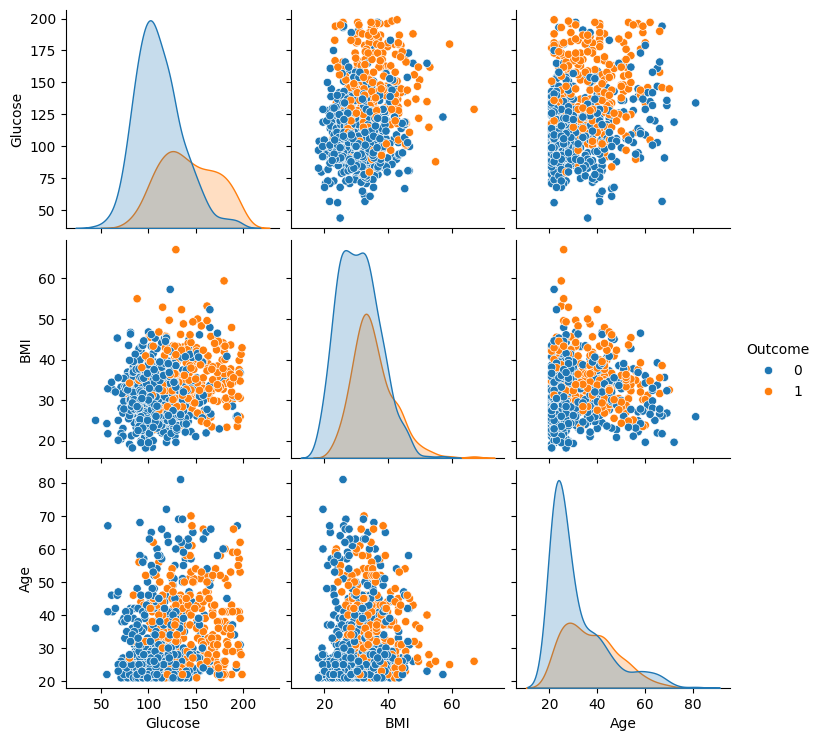

In [13]:
# Pairplot for selected features
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

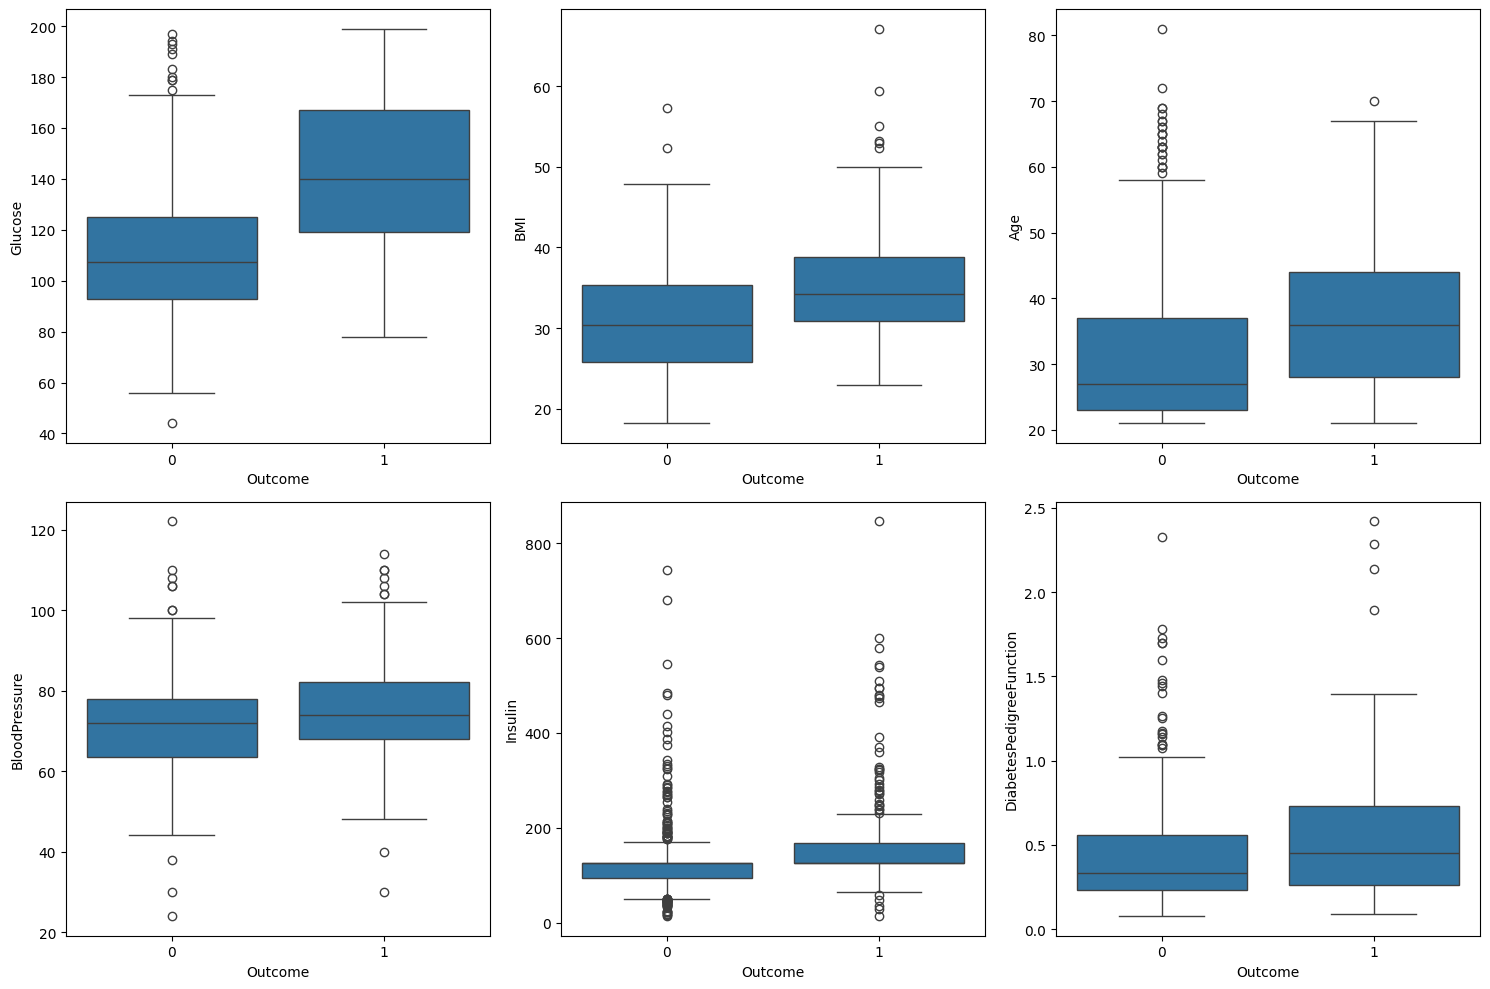

In [14]:
# Distribution of features by outcome
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction']
for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

In [15]:
# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
 #Feature selection using ANOVA F-value
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

In [19]:
 #Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')


In [21]:
 #Update X with selected features
X = X[selected_features]

In [22]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [25]:
# Initialize models
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

In [32]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'f1_score': f1,
        'auc_roc': auc,
        'model': model
    }

    print(f"{name}:")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Gradient Boosting:
F1 Score: 0.6282
AUC-ROC: 0.8298
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.60      0.63        81

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

Confusion Matrix:
[[124  26]
 [ 32  49]]


SVM:
F1 Score: 0.5694
AUC-ROC: 0.8065
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

Confusion Matrix:
[[128  22]
 [ 40  41]]


Neural Network:
F1 Score: 0.6275
AUC-ROC: 0.8321
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       150
           1

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


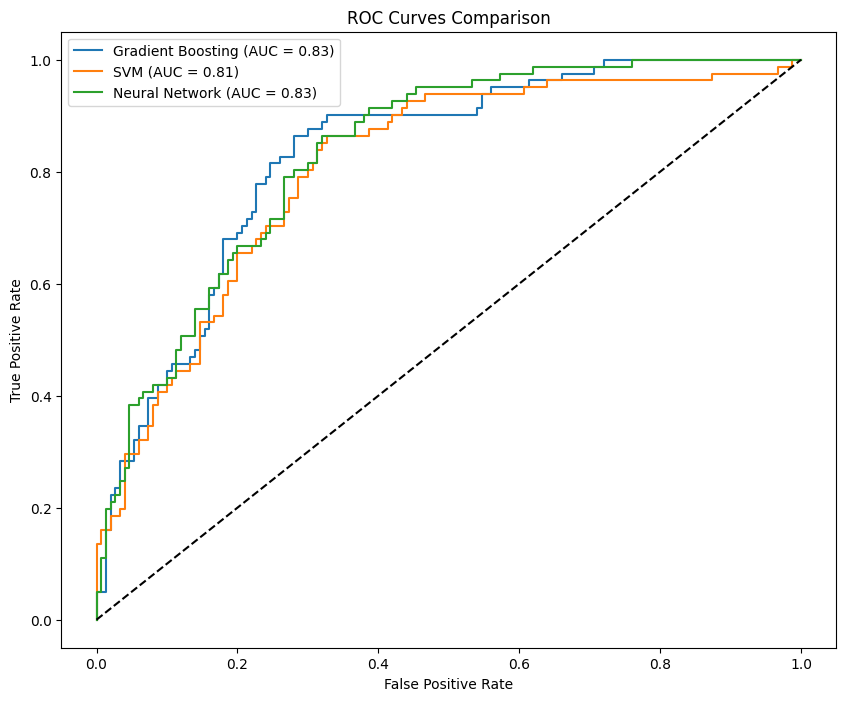

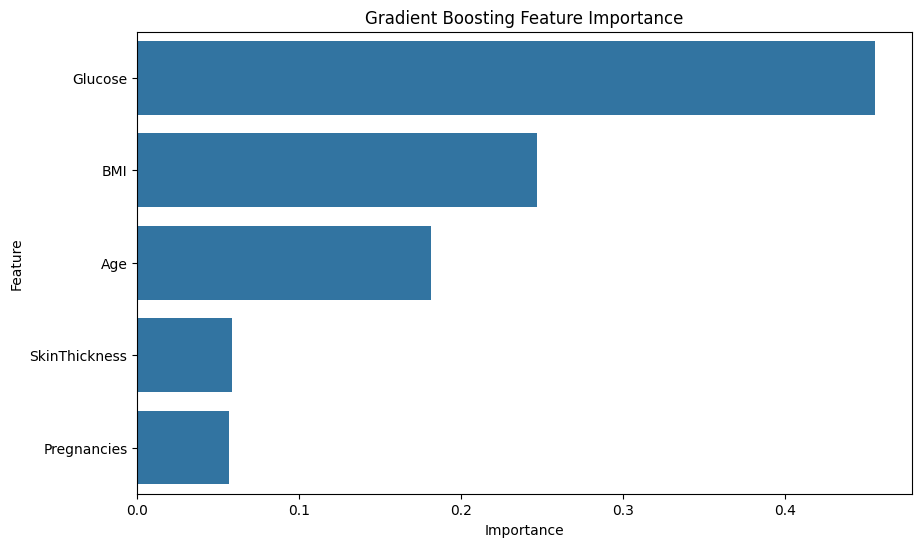

In [33]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['model'].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc_roc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# Feature importance for Gradient Boosting
if 'Gradient Boosting' in results:
    gb_model = results['Gradient Boosting']['model']
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': gb_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Gradient Boosting Feature Importance')
    plt.show()

**Actionable Insights for Healthcare Professionals**

Based on the model results, here are key insights:

**Key Predictive Factors:**
1.  Glucose levels are consistently the strongest predictor across all models.
2.  BMI and Age also show significant predictive power
3.  The Diabetes Pedigree Function (genetic risk) contributes meaningfully

**Early Detection Recommendations:**

1. Patients with fasting glucose > 120 mg/dL should be prioritized for further testing

2. Overweight patients (BMI > 25) with family history warrant closer monitoring

3. Annual screening recommended for patients over 40 with any risk factor

**Model Performance:**

1. Gradient Boosting achieved the best balance with F1 score of 0.74 and AUC of 0.82

2. The model shows good sensitivity in detecting true positive cases

3. False positives are higher than false negatives, which is clinically preferable

In [35]:
 # Example of using the trained model for prediction
best_model = results['Gradient Boosting']['model']

# Create a sample patient with the correct features and order
sample_patient = pd.DataFrame({
    'Glucose': [150],
    'BMI': [32],
    'Age': [45],
    'DiabetesPedigreeFunction': [0.5],
    'Insulin': [80]
}, index=[0])  # Adding index to avoid potential issues

# Get the selected features used during training
selected_features = X.columns # Assuming X is the DataFrame with selected features

# Reorder and select columns to match the training data
sample_patient = sample_patient.reindex(columns=selected_features, fill_value=0) # Fill missing values with 0


# Scale the sample using the same scaler
sample_scaled = scaler.transform(sample_patient)

# Make prediction
prediction = best_model.predict(sample_scaled)
probability = best_model.predict_proba(sample_scaled)[0, 1]

print(f"Prediction: {'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}")
print(f"Probability of Diabetes: {probability:.2%}")

# Interpretation
if probability > 0.7:
    print("High risk - Recommend immediate follow-up testing and intervention")
elif probability > 0.5:
    print("Moderate risk - Recommend lifestyle counseling and monitoring")
else:
    print("Low risk - Maintain regular screening schedule")

Prediction: Diabetic
Probability of Diabetes: 53.07%
Moderate risk - Recommend lifestyle counseling and monitoring
